In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
df= pd.read_excel('C:/Users/Park/_Python_data/relay-foods.xlsx', sheet_name='Purchase Data - Full Study')

C:\Users\Park\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [19]:
df.head(5)

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderId       2891 non-null   int64         
 1   OrderDate     2891 non-null   datetime64[ns]
 2   UserId        2891 non-null   int64         
 3   TotalCharges  2891 non-null   float64       
 4   CommonId      2891 non-null   object        
 5   PupId         2891 non-null   int64         
 6   PickupDate    2891 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 158.2+ KB


In [30]:
df['OrderMonth'] = df.OrderDate.apply(lambda x : datetime.strftime(x, '%Y-%m'))                                                            
df['OrderWeek'] = df.OrderDate.apply(lambda x : datetime.strftime(x, '%Y-%V'))

df

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderMonth,OrderWeek
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12,2009-01,2009-02
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20,2009-01,2009-04
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04,2009-02,2009-06
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-06
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09,2009-02,2009-06
...,...,...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08,2010-03,2010-10
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10,2010-03,2010-09
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08,2010-03,2010-09
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08,2010-03,2010-10


- 피봇 테이블을 활용하여 고객 아이디별 구매일자/월/주차 데이터 정리

In [55]:
customer_df = df.pivot_table(index = ['UserId','OrderDate','OrderMonth','OrderWeek'], values = 'TotalCharges',aggfunc='count')
customer_df = customer_df.reset_index()
customer_df

,UserId,OrderDate,OrderMonth,OrderWeek,TotalCharges
0,47,2009-01-11,2009-01,2009-02,1
1,47,2009-01-20,2009-01,2009-04,1
2,47,2009-02-03,2009-02,2009-06,1
3,47,2009-02-06,2009-02,2009-06,2
4,47,2009-02-17,2009-02,2009-08,1
...,...,...,...,...,...
2780,393616,2010-03-08,2010-03,2010-10,1
2781,394290,2010-03-07,2010-03,2010-09,1
2782,394346,2010-03-07,2010-03,2010-09,1
2783,395039,2010-03-08,2010-03,2010-10,1


- 고객 아이디와 주문일자 기준으로 정렬
- 고객 아이디를 기준으로 중복된 데이터 제거(drop_duplitcates) - 가장 위에 있는(주문일자가 가장 오래된) 데이터만 남겨두어 최종적으로 고객별 가장 오래된 주문일자 데이터 출력
- 컬럼명을 joindate, joinmonth, joinweek등으로 변경
- 가장 오래된 시점을 첫 번째 신규 고객 가입 시점이라 가정

In [56]:
customer_df = customer_df.sort_values(by=['UserId','OrderDate'])
customer_df = customer_df.drop_duplicates(subset = ['UserId'])
customer_df.columns = ['UserId','JoinDate','JoinMonth','JoinWeek','FirstPurchase']
customer_df

,UserId,JoinDate,JoinMonth,JoinWeek,FirstPurchase
0,47,2009-01-11,2009-01,2009-02,1
66,95,2009-03-10,2009-03,2009-11,1
68,98,2009-01-29,2009-01,2009-05,1
76,112,2009-01-19,2009-01,2009-04,1
77,141,2009-11-13,2009-11,2009-46,1
...,...,...,...,...,...
2780,393616,2010-03-08,2010-03,2010-10,1
2781,394290,2010-03-07,2010-03,2010-09,1
2782,394346,2010-03-07,2010-03,2010-09,1
2783,395039,2010-03-08,2010-03,2010-10,1


- 위의 자료와 본래 데이터를 결합

In [62]:
merge_customer_df = pd.merge(df, customer_df, how = 'left', on = 'UserId')
display(merge_customer_df)

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderMonth,OrderWeek,JoinDate,JoinMonth,JoinWeek,FirstPurchase
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12,2009-01,2009-02,2009-01-11,2009-01,2009-02,1
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20,2009-01,2009-04,2009-01-11,2009-01,2009-02,1
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04,2009-02,2009-06,2009-01-11,2009-01,2009-02,1
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-06,2009-01-11,2009-01,2009-02,1
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09,2009-02,2009-06,2009-01-11,2009-01,2009-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08,2010-03,2010-10,2010-03-08,2010-03,2010-10,1
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10,2010-03,2010-09,2010-03-07,2010-03,2010-09,1
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08,2010-03,2010-09,2010-03-07,2010-03,2010-09,1
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08,2010-03,2010-10,2010-03-08,2010-03,2010-10,1


- 가입시점으로부터 경과기간 계산

In [64]:
month_dict = {}
i = 0

for month in sorted(merge_customer_df.OrderMonth.unique()):
    month_dict[month] = i
    i += 1
month_dict

{'2009-01': 0,
 '2009-02': 1,
 '2009-03': 2,
 '2009-04': 3,
 '2009-05': 4,
 '2009-06': 5,
 '2009-07': 6,
 '2009-08': 7,
 '2009-09': 8,
 '2009-10': 9,
 '2009-11': 10,
 '2009-12': 11,
 '2010-01': 12,
 '2010-02': 13,
 '2010-03': 14}

In [67]:
merge_customer_df['Period_month'] = merge_customer_df.OrderMonth.apply(lambda x : month_dict[x]) - merge_customer_df.JoinMonth.apply(lambda x : month_dict[x])
merge_customer_df

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderMonth,OrderWeek,JoinDate,JoinMonth,JoinWeek,FirstPurchase,Period_month
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12,2009-01,2009-02,2009-01-11,2009-01,2009-02,1,0
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20,2009-01,2009-04,2009-01-11,2009-01,2009-02,1,0
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04,2009-02,2009-06,2009-01-11,2009-01,2009-02,1,1
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-06,2009-01-11,2009-01,2009-02,1,1
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09,2009-02,2009-06,2009-01-11,2009-01,2009-02,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08,2010-03,2010-10,2010-03-08,2010-03,2010-10,1,0
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10,2010-03,2010-09,2010-03-07,2010-03,2010-09,1,0
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08,2010-03,2010-09,2010-03-07,2010-03,2010-09,1,0
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08,2010-03,2010-10,2010-03-08,2010-03,2010-10,1,0


- 피벗테이블로 변환

In [87]:
final_df = merge_customer_df.pivot_table(index = 'JoinMonth', columns = 'Period_month', values = 'TotalCharges', aggfunc = 'sum')
final_df

Period_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
JoinMonth,,,,,,,,,,,,,,,
2009-01,1850.2550,1351.0650,1357.3600,1604.5000,1575.6250,1384.8400,1750.8400,1426.5714,1964.2755,860.3292,1821.8153,2152.1165,2084.2236,2068.7771,1504.3325
2009-02,666.3100,501.6100,968.7800,53.3600,758.5200,667.1000,314.1752,567.5057,328.2800,738.9359,263.1971,550.0098,734.7613,NaN,NaN
2009-03,806.3100,463.8000,1108.2100,902.7100,161.2500,1010.8000,1256.4672,1067.9247,905.3610,485.9966,897.1602,642.1517,76.3100,NaN,NaN
2009-04,2561.2500,1189.5800,1085.3800,987.1300,474.0100,531.3825,209.4465,339.1139,147.3250,445.5447,634.6950,279.8733,NaN,NaN,NaN
2009-05,2627.5600,1146.8300,648.2100,381.1500,415.5969,389.0605,351.6800,420.2842,223.5689,613.8222,81.8283,NaN,NaN,NaN,NaN
2009-06,1544.2200,1165.9000,688.2129,922.7762,504.4159,182.9100,295.0000,514.9887,1211.4755,162.1200,NaN,NaN,NaN,NaN,NaN
2009-07,2797.7600,1858.3499,1312.8502,1053.5599,833.4690,506.2409,793.0552,1163.1282,401.7190,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,2605.9981,1869.4376,1313.7691,1228.7399,1723.3975,1213.1379,1595.9906,478.7787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1953.0553,2433.3013,1953.2262,1371.3499,2262.0346,1842.9434,688.6822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 가입시점을 기준으로 시간 경과에 따른 증감율 표시

In [88]:
first_charges = final_df[0].copy()

for col in final_df.columns :
    final_df[col] = final_df[col] / first_charges
final_df

Period_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
JoinMonth,,,,,,,,,,,,,,,
2009-01,1.0,0.730205,0.733607,0.867178,0.851572,0.748459,0.946270,0.771013,1.061624,0.464979,0.984629,1.163146,1.126452,1.118104,0.813041
2009-02,1.0,0.752818,1.453948,0.080083,1.138389,1.001186,0.471515,0.851714,0.492684,1.108997,0.395007,0.825456,1.102732,NaN,NaN
2009-03,1.0,0.575213,1.374422,1.119557,0.199985,1.253612,1.558293,1.324459,1.122845,0.602742,1.112674,0.796408,0.094641,NaN,NaN
2009-04,1.0,0.464453,0.423770,0.385409,0.185070,0.207470,0.081775,0.132402,0.057521,0.173956,0.247807,0.109272,NaN,NaN,NaN
2009-05,1.0,0.436462,0.246697,0.145059,0.158168,0.148069,0.133843,0.159952,0.085086,0.233609,0.031142,NaN,NaN,NaN,NaN
2009-06,1.0,0.755009,0.445670,0.597568,0.326648,0.118448,0.191035,0.333494,0.784523,0.104985,NaN,NaN,NaN,NaN,NaN
2009-07,1.0,0.664228,0.469250,0.376573,0.297906,0.180945,0.283461,0.415736,0.143586,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,1.0,0.717360,0.504133,0.471505,0.661320,0.465518,0.612430,0.183722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1.0,1.245895,1.000088,0.702156,1.158203,0.943621,0.352618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Period_month', ylabel='JoinMonth'>

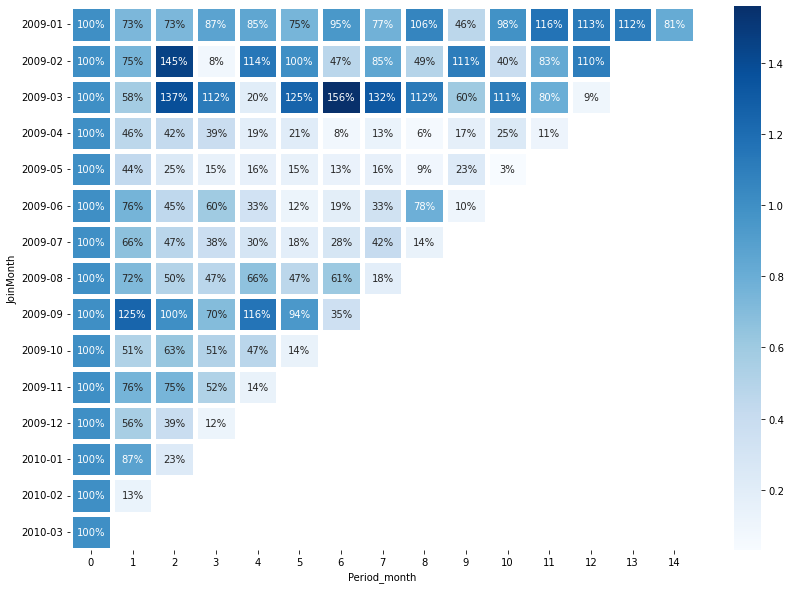

In [93]:
plt.figure(figsize=(14,10))
sns.heatmap(final_df, annot=True, fmt='.0%', linewidth=5, cmap = 'Blues')

In [109]:
final_df[final_df.values >1.0].drop_duplicates()

Period_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
JoinMonth,,,,,,,,,,,,,,,
2009-01,1.0,0.730205,0.733607,0.867178,0.851572,0.748459,0.946270,0.771013,1.061624,0.464979,0.984629,1.163146,1.126452,1.118104,0.813041
2009-02,1.0,0.752818,1.453948,0.080083,1.138389,1.001186,0.471515,0.851714,0.492684,1.108997,0.395007,0.825456,1.102732,NaN,NaN
2009-03,1.0,0.575213,1.374422,1.119557,0.199985,1.253612,1.558293,1.324459,1.122845,0.602742,1.112674,0.796408,0.094641,NaN,NaN
2009-09,1.0,1.245895,1.000088,0.702156,1.158203,0.943621,0.352618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 80% 이상을 보여주는 지표

<AxesSubplot:xlabel='Period_month', ylabel='JoinMonth'>

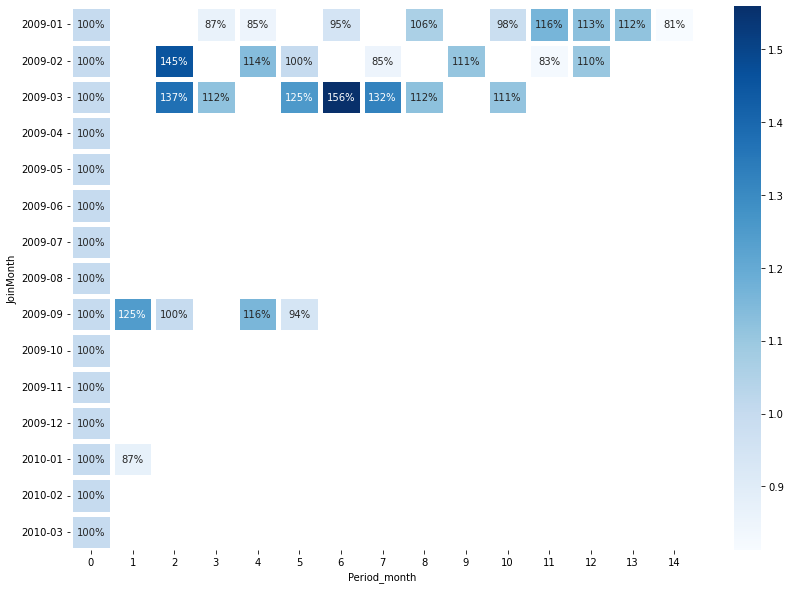

In [119]:
up = final_df[final_df.iloc[:,:]>=0.8]

plt.figure(figsize=(14,10))
sns.heatmap(up, annot=True, fmt='.0%', linewidth=5, cmap = 'Blues')

plt.figure(figsize=(14,10))
sns.heatmap(up, annot=True, fmt='.0%', linewidth=5, cmap = 'Blues')

- 50%이하를 보여주는 지표 

<AxesSubplot:xlabel='Period_month', ylabel='JoinMonth'>

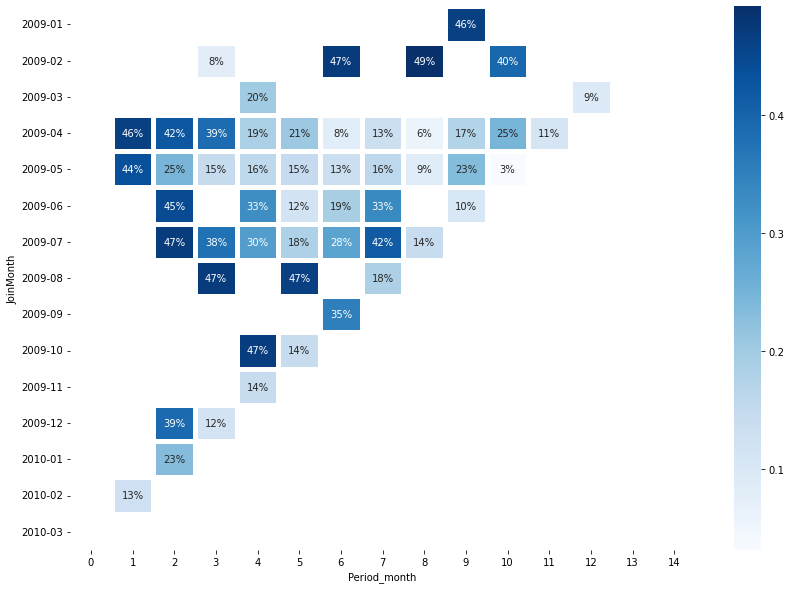

In [120]:
down = final_df[final_df.iloc[:,:]<=0.5]

plt.figure(figsize=(14,10))
sns.heatmap(down, annot=True, fmt='.0%', linewidth=5, cmap = 'Blues')

- 전달 대비 감소율이 70% 이상인 부분 출력

In [219]:
a = pd.DataFrame(columns=np.arange(0,14))

for i in np.arange(0,14):
    a[i] = round((final_df[i+1] - final_df[i]) / final_df[i],4)
    

In [220]:
a['First'] = final_df[0]
a = a[a.columns[[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]]
a.columns = np.arange(0,15)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
JoinMonth,,,,,,,,,,,,,,,
2009-01,1.0,-0.2698,0.0047,0.1821,-0.0180,-0.1211,0.2643,-0.1852,0.3769,-0.5620,1.1176,0.1813,-0.0315,-0.0074,-0.2728
2009-02,1.0,-0.2472,0.9313,-0.9449,13.2151,-0.1205,-0.5290,0.8063,-0.4215,1.2509,-0.6438,1.0897,0.3359,NaN,NaN
2009-03,1.0,-0.4248,1.3894,-0.1854,-0.8214,5.2685,0.2430,-0.1501,-0.1522,-0.4632,0.8460,-0.2842,-0.8812,NaN,NaN
2009-04,1.0,-0.5355,-0.0876,-0.0905,-0.5198,0.1210,-0.6058,0.6191,-0.5656,2.0242,0.4245,-0.5590,NaN,NaN,NaN
2009-05,1.0,-0.5635,-0.4348,-0.4120,0.0904,-0.0639,-0.0961,0.1951,-0.4681,1.7456,-0.8667,NaN,NaN,NaN,NaN
2009-06,1.0,-0.2450,-0.4097,0.3408,-0.4534,-0.6374,0.6128,0.7457,1.3524,-0.8662,NaN,NaN,NaN,NaN,NaN
2009-07,1.0,-0.3358,-0.2935,-0.1975,-0.2089,-0.3926,0.5666,0.4666,-0.6546,NaN,NaN,NaN,NaN,NaN,NaN
2009-08,1.0,-0.2826,-0.2972,-0.0647,0.4026,-0.2961,0.3156,-0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09,1.0,0.2459,-0.1973,-0.2979,0.6495,-0.1853,-0.6263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='JoinMonth'>

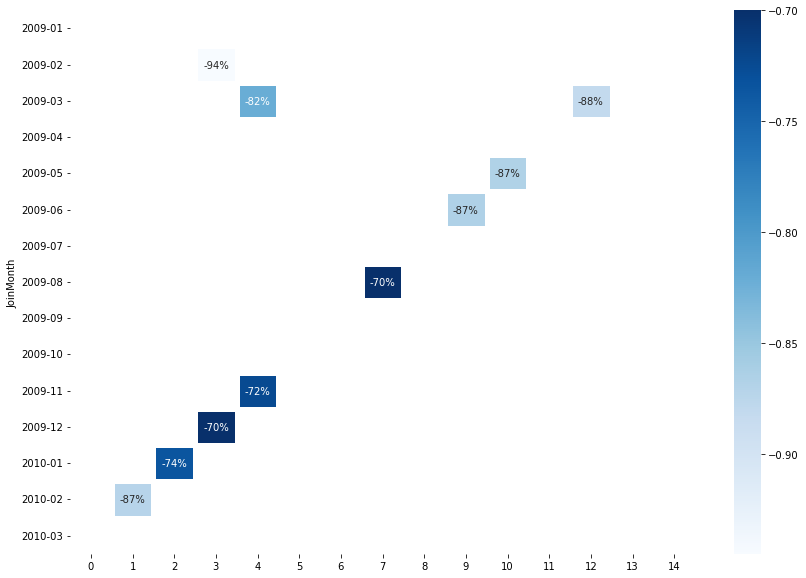

In [222]:
a_down = a[a.iloc[:,:]<= -0.7]

plt.figure(figsize=(14,10))
sns.heatmap(a_down, annot=True, fmt='.0%', linewidth=5, cmap = 'Blues')